In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
#!pip install nltk

In [3]:
#!pip install wordcloud

In [2]:
import nltk

In [4]:
reviews = pd.read_csv("imdb_sentiment.csv")

In [5]:
reviews.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
#Dataset is scrapped from IMDB about the movie reviews
# Review in the form of free text was scrapped and the user rating
# A user rating of 1,2,3 -> sentiment 0
# A user rating of 4 and 5 -> sentiment 1

In [6]:
reviews.shape

(748, 2)

In [7]:
reviews.sentiment.value_counts()

1    386
0    362
Name: sentiment, dtype: int64

Getting insignts from the reviews:

        1. Word cloud
        2. Bar graph

### Get the word cloud:

    1. combine all the reviews into a single string
    2. instantiate word cloud
    3. generate the word cloud

In [8]:
from wordcloud import WordCloud

In [9]:
reviews_combined = " ".join(reviews.review.values)

In [10]:
#Understanding join
lst = ["A","B","C"]
" ".join(lst)

'A B C'

In [11]:
reviews_combined[:200]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.   Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.   Attempting a'

In [12]:
word_cloud = WordCloud(width=800,height=500,
                       background_color='white',
                       max_words=150).\
generate(reviews_combined)

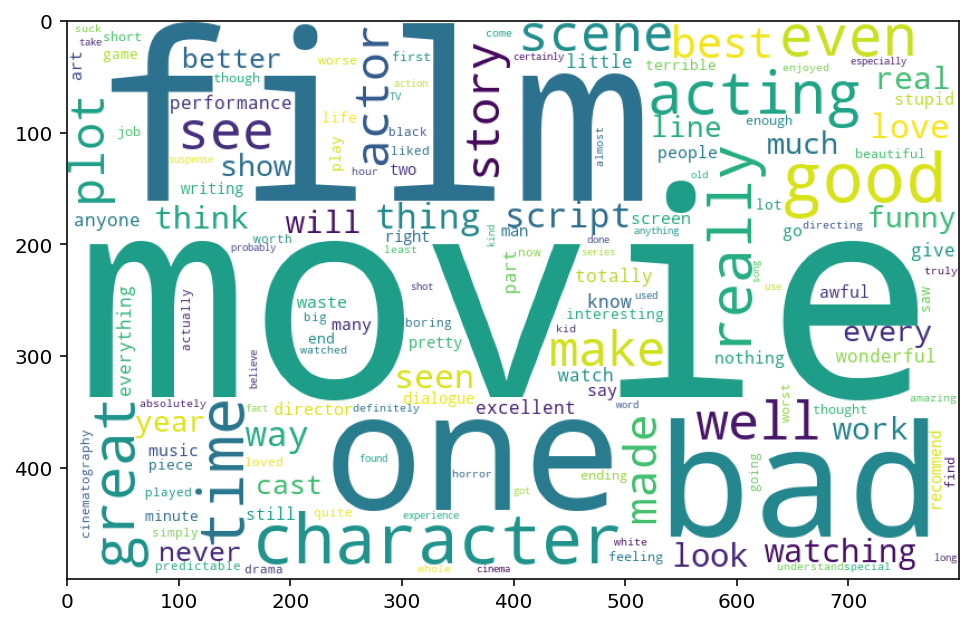

In [13]:
%config InlineBackend.figure_format="retina"
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar graph of top 25 used words

1. get the words and the frequencies
2. sort based on frequencies and get the top 25 words
3. plot the bar graph

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreyas.donki/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from nltk.tokenize import word_tokenize


In [18]:
from nltk.probability import FreqDist
fdist = FreqDist(word_tokenize(reviews_combined))
fdist

FreqDist({'.': 904, 'the': 657, ',': 649, 'and': 418, 'a': 413, 'of': 370, 'is': 339, 'I': 285, 'to': 247, 'it': 234, ...})

In [19]:
fdist

FreqDist({'.': 904, 'the': 657, ',': 649, 'and': 418, 'a': 413, 'of': 370, 'is': 339, 'I': 285, 'to': 247, 'it': 234, ...})

In [20]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

In [21]:
#Top 5 words based on frequency
df_dist.sort_values(ascending=False, by="freq").head(5)

,words,freq
12,.,904
20,the,657
2,",",649
37,and,418
7,a,413


<AxesSubplot:xlabel='words'>

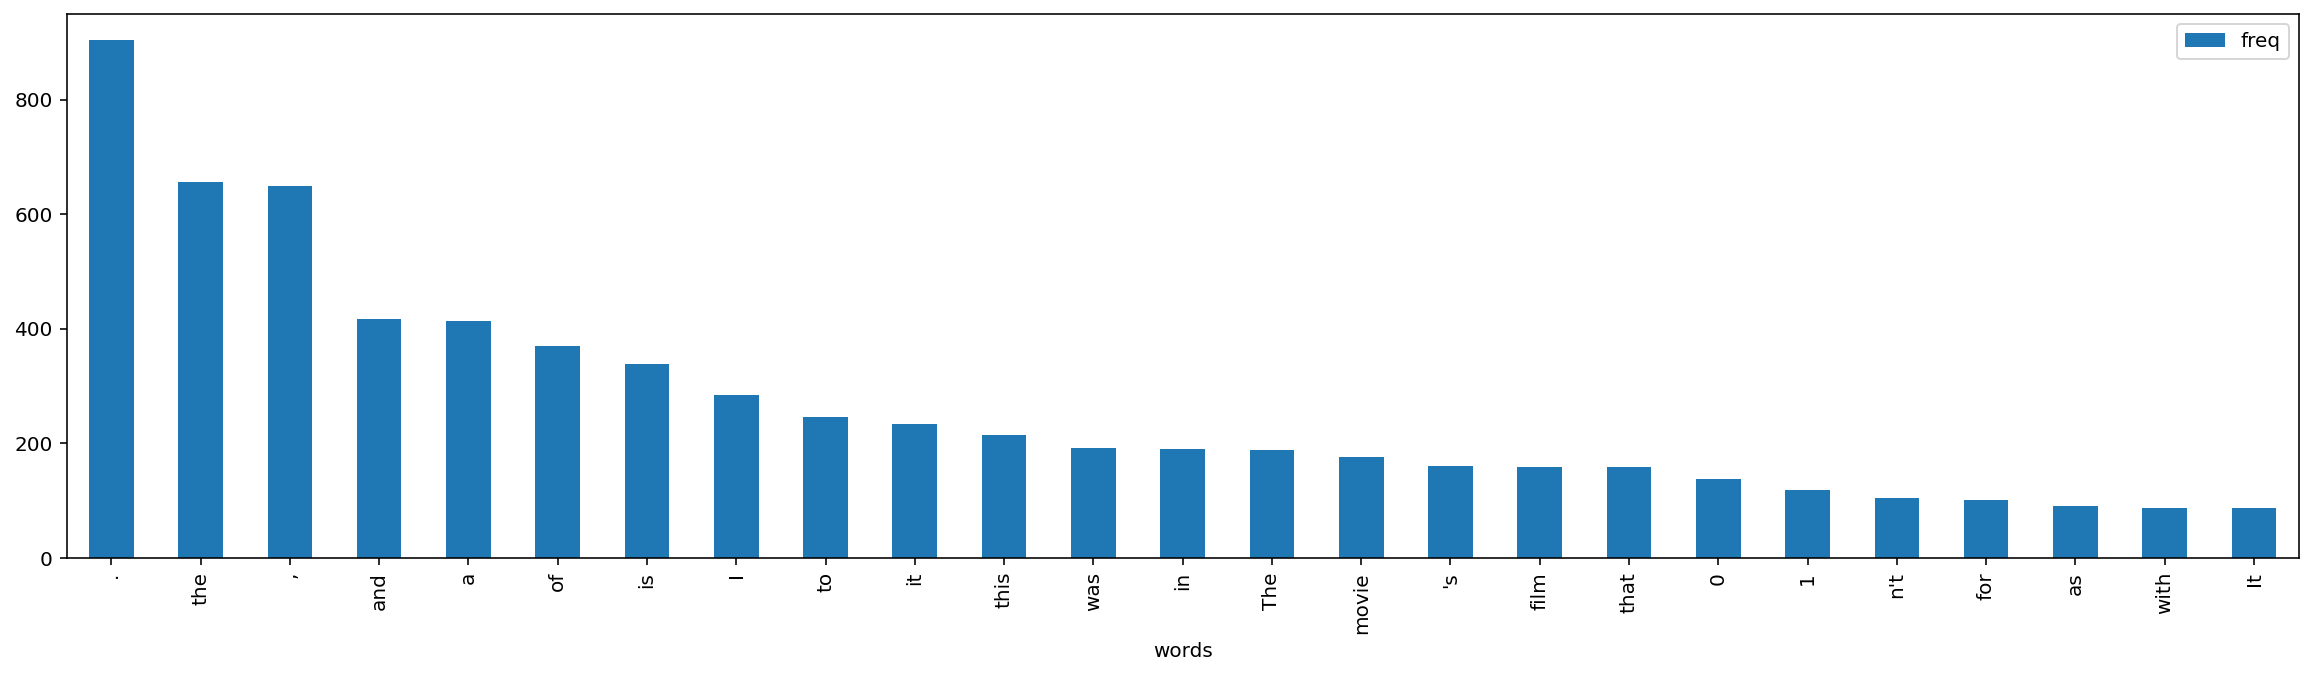

In [22]:
%config InlineBackend.figure_format="retina"
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with these visuals:

    1.Too many distinct words in the corpus of reviews
        1.Text is non uniform case
        2.Punctuations present in the text
        3.There are language connectors in the text - stop words
        4.Words with different forms/tenses - charge, charged, charging

Basic Text processing tasks:

    1. Text cleaning
    2. Get the visuals - word cloud and bar graph or frequency graph
    3. Converting text to numeric matrices
    4. Advanced visuals using collocations(n-grams - unigrams, bigrams, trigrams)
    5. Sentiment analysis and sentiment classification
    6. text classification

In [23]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

In [24]:
#Top 5 words based on frequency
df_dist.sort_values(ascending=False, by="freq").head(5)

,words,freq
12,.,904
20,the,657
2,",",649
37,and,418
7,a,413


<AxesSubplot:xlabel='words'>

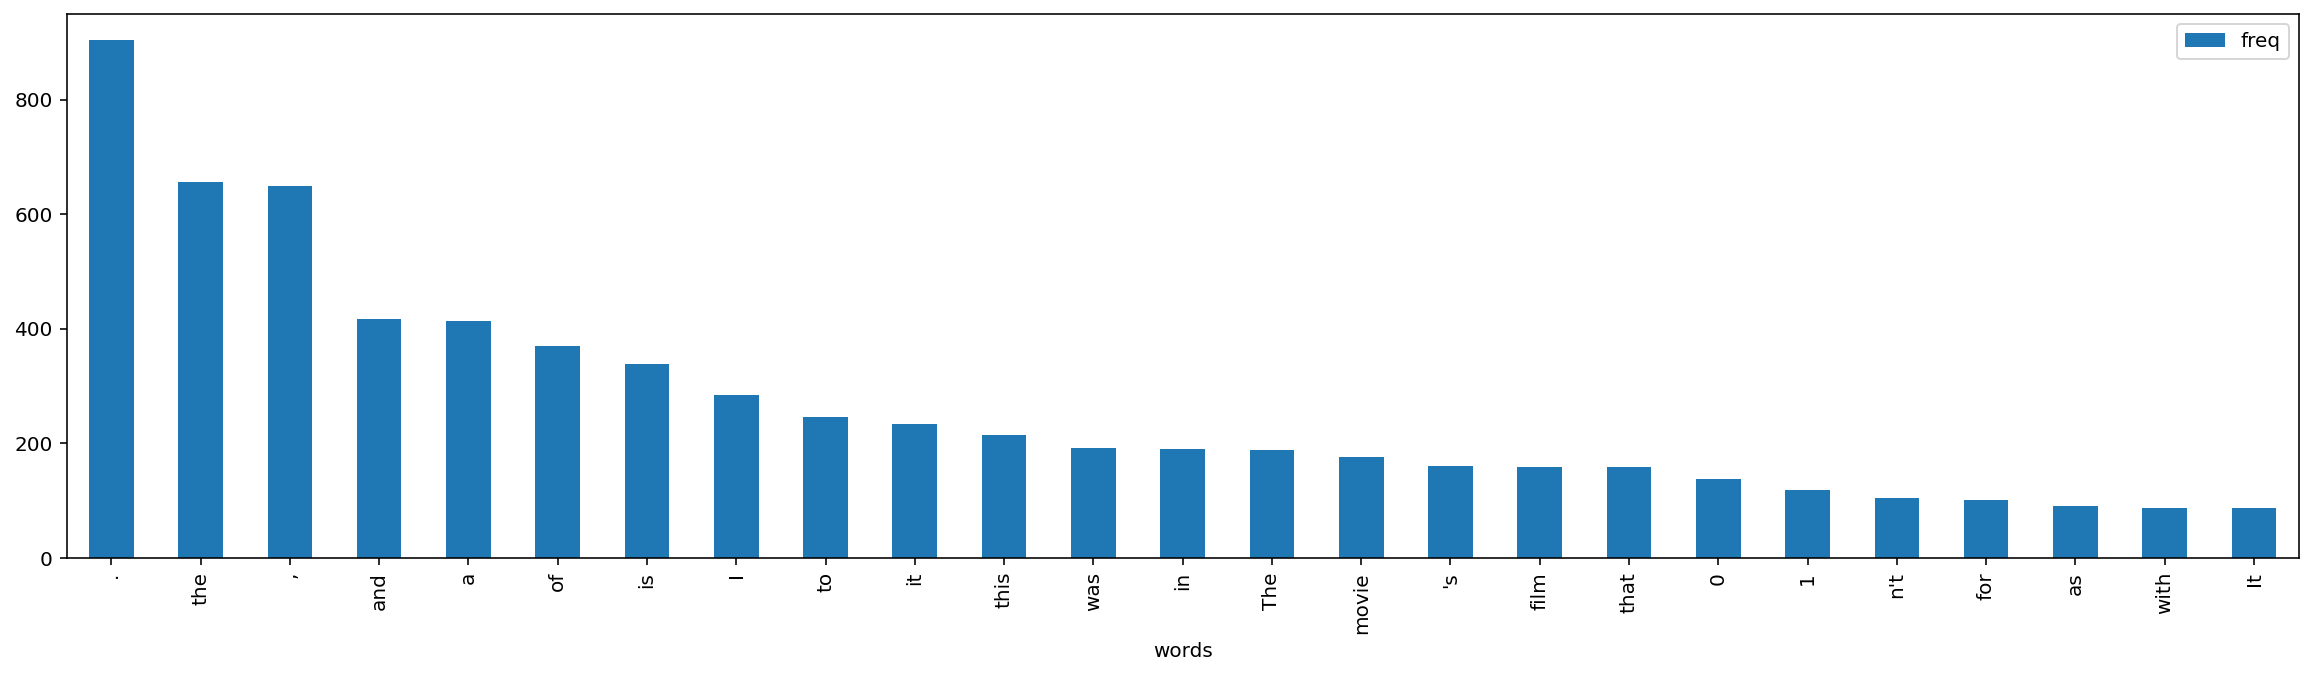

In [25]:
%config InlineBackend.figure_format="retina"
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

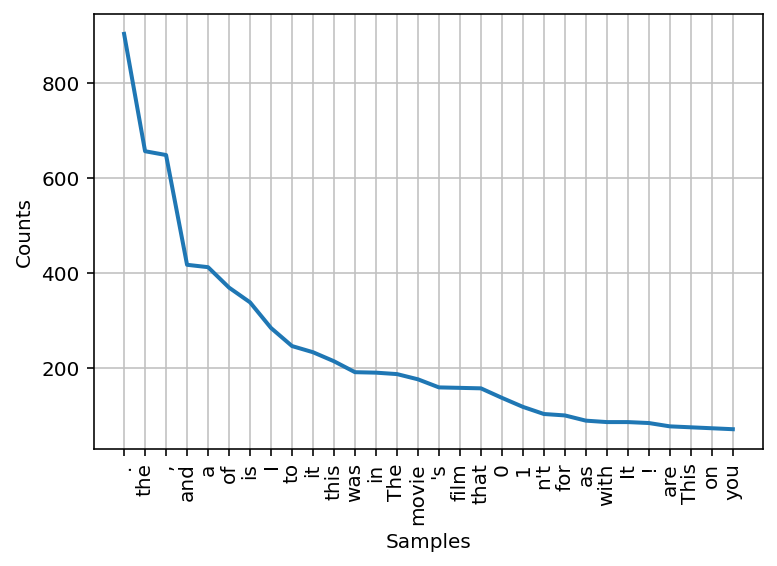

In [27]:
%config InlineBackend.figure_format="retina"
fdist.plot(30)
plt.show()

The head and the tail of the above graph consists of either punct or stop words which needs to be removed

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyas.donki/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords

In [35]:
stop_nltk = stopwords.words("english")

In [36]:
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
negative_words = ['don', "don't",'no','not','ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [55]:
for neg in negative_words:
    stop_nltk.remove(neg)

ValueError: list.remove(x): x not in list

In [56]:
stop_updated = stop_nltk + ["movie","film"]

In [57]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreyas.donki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
from nltk.stem import WordNetLemmatizer

In [59]:
lemm = WordNetLemmatizer()

lets build a udf

- input : review 
- Tasks : All the above cleaning steps
- Return : string of cleaned reveiw

based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_review"

In [60]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing Non-Alpha-numeric and non space charecters with space
    result1 = re.sub("[^\w\s]"," ",sent)
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", result1)
    tokens = word_tokenize(result.lower())
    lemm_token = [lemm.lemmatize(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    res = " ".join(lemm_token)
    return res

In [61]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [62]:
reviews.head()

,review,sentiment,clean_review
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young man
1,Not sure who was more lost - the flat characte...,0,not sure lost flat character audience nearly h...
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...


# Word cloud on cleaned dataset

In [63]:
reviews_combined_clean = " ".join(reviews.clean_review.values)

In [64]:
reviews_combined_clean[:500]

'slow moving aimless distressed drifting young man not sure lost flat character audience nearly half walked attempting artiness black white clever camera angle disappointed became even ridiculous acting poor plot line almost non existent little music anything speak best scene gerardo trying find song keep running head rest lack art charm meaning emptiness work guess empty wasted two hour saw today thought good effort good message kid bit predictable loved casting jimmy buffet science teacher baby'

In [65]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined_clean)

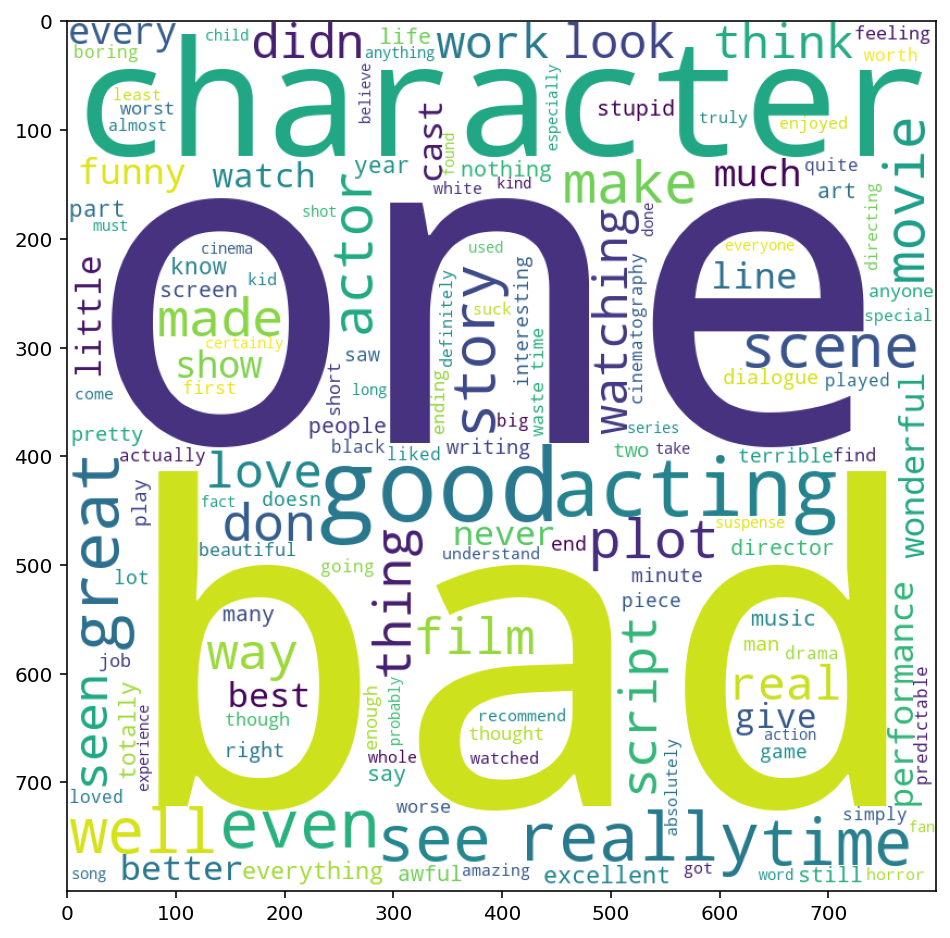

In [66]:
%config InlineBackend.figure_format="retina"
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [67]:
from nltk.probability import FreqDist
all_terms = word_tokenize(reviews_combined_clean)
fdist = FreqDist(all_terms)

In [68]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

<AxesSubplot:xlabel='words'>

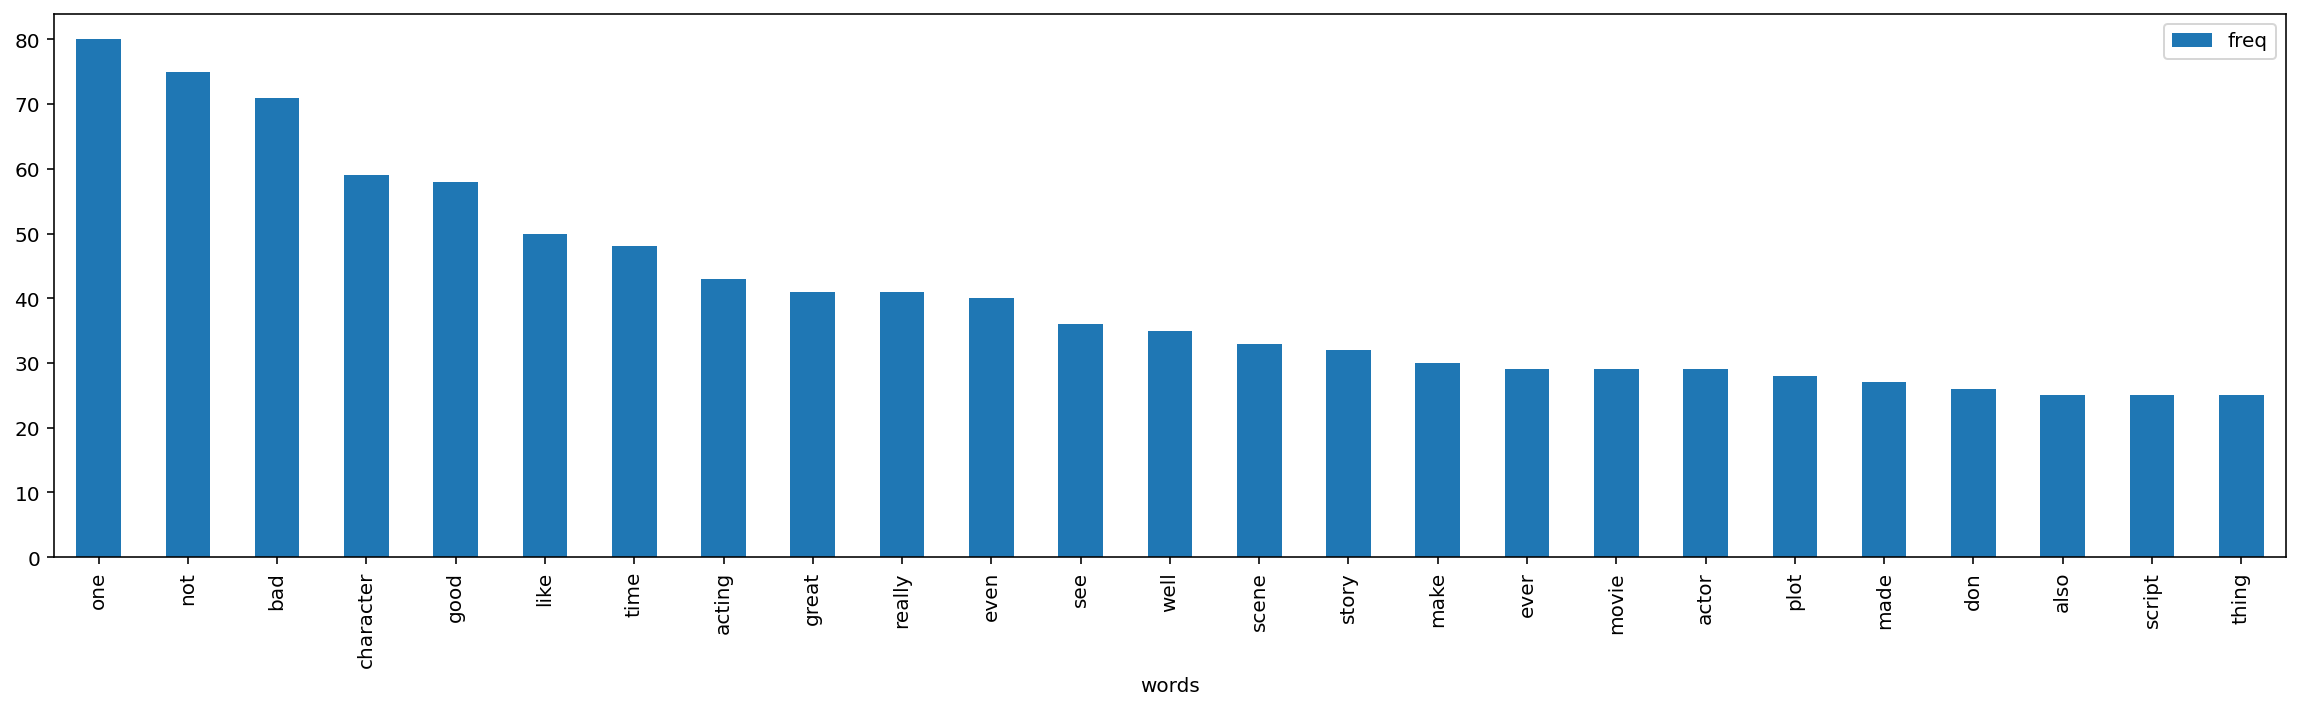

In [69]:
%config InlineBackend.figure_format="retina"
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=150)

In [72]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [73]:
print(bigram_count_vectorizer.get_feature_names()[:20])

['acting bad', 'aerial scene', 'almost unrecognizable', 'also great', 'anyone could', 'appreciate subtle', 'avoid avoid', 'avoid cost', 'bad acting', 'bad bad', 'bad script', 'big fan', 'billy drago', 'bit predictable', 'black water', 'black white', 'camera angle', 'camera work', 'cast also', 'character interesting']


<AxesSubplot:>

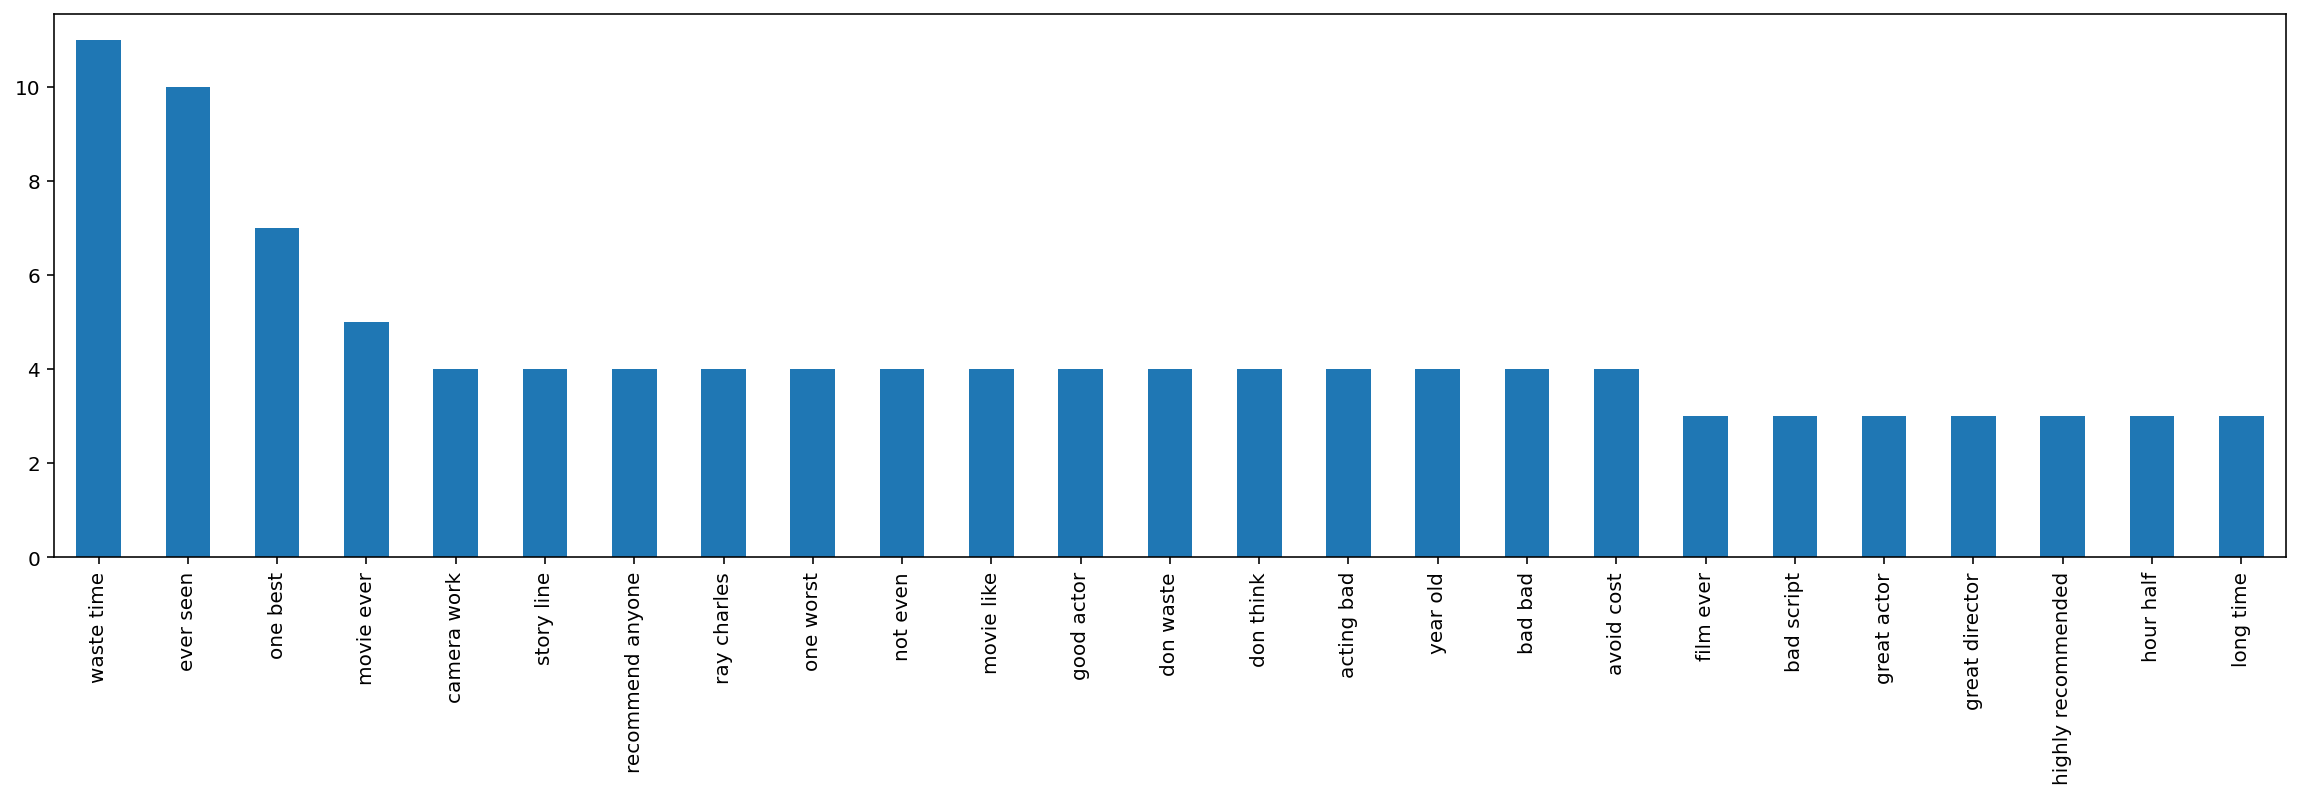

In [74]:
%config InlineBackend.figure_format="retina"
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))  

# Sentiment Classification

### Sentiment Prediction: Building our own model based on the Sentiment labels

- Step1: get the X and y
- Step2: converting text to numbers (countvectorizer or tfidfvectorizer)
- Step3: Split into test and train
- Step4: train the model
- Step5: test and get the accuracy scores
- Step6: Make predictions for an Input Review

In [75]:
#Create a document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tfidf_vect = TfidfVectorizer(max_features=3500)

In [77]:
X_text = reviews.clean_review.values
y = reviews.sentiment.values

In [78]:
#Extract the features on the reviews for train - fit
#Compute the count of every word extarcted in every document(review)
X = tfidf_vect.fit_transform(X_text)

In [79]:
X.shape

(748, 2711)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logreg = LogisticRegression()

In [84]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_test_pred = logreg.predict(X_test)

In [86]:
accuracy_score(y_test, y_test_pred)

0.7866666666666666

In [88]:
#Make Predictions:
review1 = "This is a fantastic mobile really like it but the battery drains fast"
review2 = "Camera is good but when I speak over phone continuously over long time it gets heated up"

In [89]:
review = [review1,review2]

In [90]:
c_review = list(map(clean_txt, review))

In [91]:
X_test_new = tfidf_vect.transform(c_review)

In [92]:
y_test_pred_new = logreg.predict(X_test_new)

In [93]:
y_test_pred_new

array([1, 1])

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
nb = MultinomialNB()

In [96]:
nb.fit(X_train,y_train)

MultinomialNB()

In [97]:
y_test_pred = nb.predict(X_test)

In [98]:
accuracy_score(y_test, y_test_pred)

0.7666666666666667

In [99]:
y_test_pred_new = nb.predict(X_test_new)

In [100]:
y_test_pred_new

array([1, 1])

In [101]:
from sklearn.svm import SVC

In [102]:
svc = SVC()

In [103]:
svc.fit(X_train,y_train)

SVC()

In [104]:
y_test_pred = svc.predict(X_test)

In [105]:
accuracy_score(y_test, y_test_pred)

0.7866666666666666